In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
file_path = "C:\\Users\\Jancy\\Downloads\\College Data.csv"

In [11]:
df = pd.read_csv(file_path)

In [12]:
print(df.head())

   College ID      Country  Total Students   Male  Female       CGPA  \
0  College 52           UK           27002   2593   11644  10.000000   
1  College 93  Switzerland           11913   9392    2521   6.951278   
2  College 15        Japan           15644   5475    4388   9.327922   
3  College 72    Singapore           13239   7363    5876   8.681112   
4  College 61       Canada           10236  13339   -3103   8.560567   

   Annual Family Income                   Branch      Sports  \
0               3574250                  Physics    Swimming   
1                762556     Chemical Engineering   Athletics   
2               1795845  Business Administration  Volleyball   
3               1222223                  Physics      Tennis   
4               1921133            Biotechnology   Athletics   

   Research Papers Published  Placement Rate  Faculty Count  
0                         39          100.00            655  
1                         31           68.84            25

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College ID                 50000 non-null  object 
 1   Country                    50000 non-null  object 
 2   Total Students             50000 non-null  int64  
 3   Male                       50000 non-null  int64  
 4   Female                     50000 non-null  int64  
 5   CGPA                       50000 non-null  float64
 6   Annual Family Income       50000 non-null  int64  
 7   Branch                     50000 non-null  object 
 8   Sports                     50000 non-null  object 
 9   Research Papers Published  50000 non-null  int64  
 10  Placement Rate             50000 non-null  float64
 11  Faculty Count              50000 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 4.6+ MB
None


In [14]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [15]:
print("Missing values:")

Missing values:


In [16]:
print(df.isnull().sum())

College ID                   0
Country                      0
Total Students               0
Male                         0
Female                       0
CGPA                         0
Annual Family Income         0
Branch                       0
Sports                       0
Research Papers Published    0
Placement Rate               0
Faculty Count                0
dtype: int64


In [17]:
df.drop(columns=["College ID"], inplace=True)

In [18]:
df["Female"] = df["Female"].apply(lambda x: abs(x))

In [19]:
le = LabelEncoder()

In [20]:
for col in ["Country", "Branch", "Sports"]:
    df[col] = le.fit_transform(df[col])

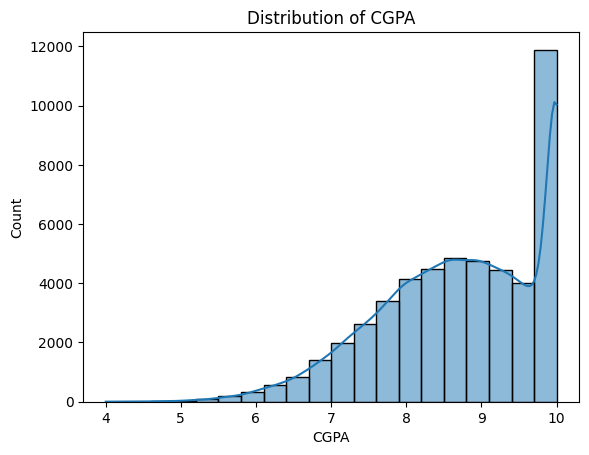

In [21]:
y = df["CGPA"]
sns.histplot(y, bins=20, kde=True)
plt.title("Distribution of CGPA")
plt.show()

In [22]:
X = df.drop(columns=["CGPA"])
y = df["CGPA"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)

In [32]:
mse = mean_squared_error(y_test, y_pred)

In [33]:
r2 = r2_score(y_test, y_pred)

In [34]:
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.6993010279261989


In [35]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.7592560328074934


In [36]:
print(f"R2 Score: {r2}")

R2 Score: 0.3174202179314778


In [37]:
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='CGPA'>

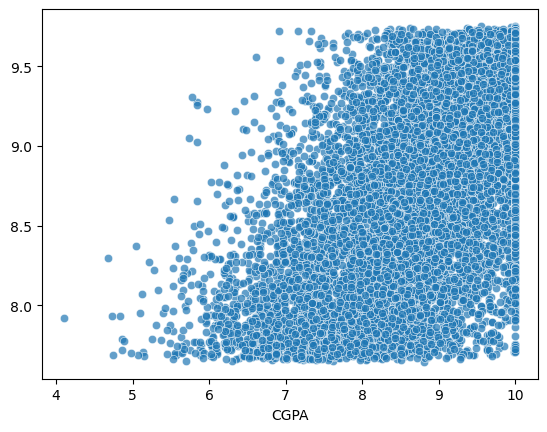

In [38]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

In [39]:
selected_features = ["CGPA", "Placement Rate", "Research Papers Published", "Branch"]

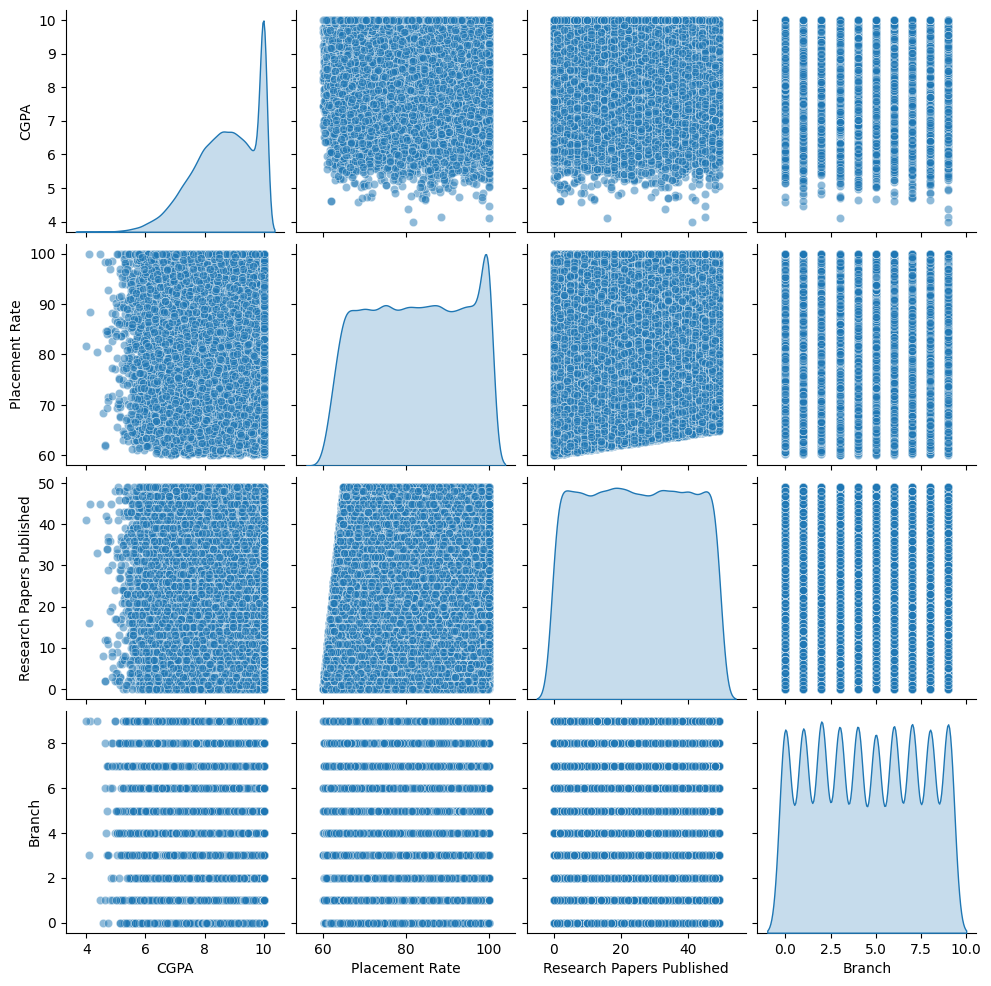

In [40]:
sns.pairplot(df[selected_features], diag_kind="kde", plot_kws={"alpha": 0.5})

In [44]:
plt.show()

In [45]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [46]:
predicted_cgpa = model.predict(X_test)

In [47]:
y_test_cgpa = df.loc[y_test.index, "CGPA"] 

<Axes: xlabel='CGPA'>

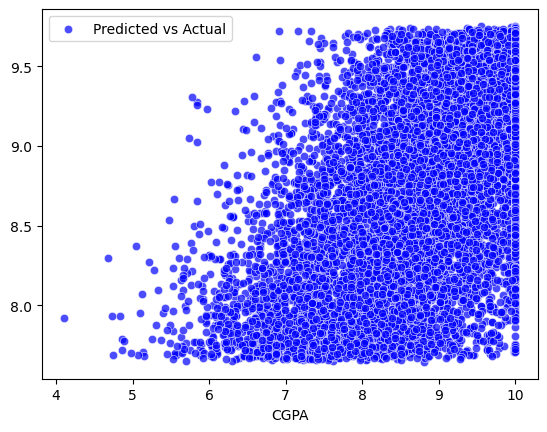

In [48]:
sns.scatterplot(x=y_test_cgpa, y=predicted_cgpa, alpha=0.7, color="blue", label="Predicted vs Actual")

In [49]:
x_range = np.linspace(min(y_test_cgpa), max(y_test_cgpa), 100)

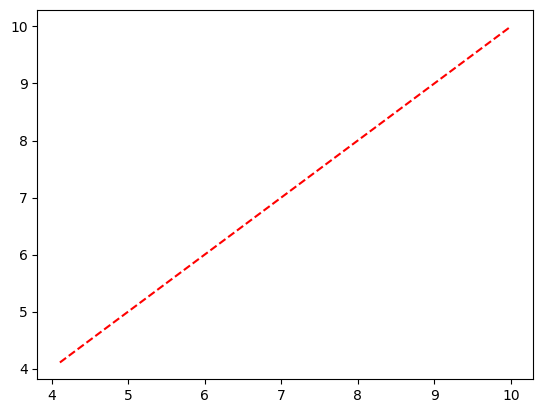

In [50]:
plt.plot(x_range, x_range, color="red", linestyle="dashed", label="Perfect Prediction (y = x)")

In [51]:
r2 = r2_score(y_test_cgpa, predicted_cgpa)

In [52]:
plt.figure(figsize=(10, 6)) 

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [53]:
x_range = np.linspace(min(y_test_cgpa), max(y_test_cgpa), 100)

In [54]:
sns.set(style="whitegrid")

In [56]:
sns.histplot(df["CGPA"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of CGPA")

Text(0.5, 1.0, 'Distribution of CGPA')

In [57]:
sns.scatterplot(x=df["CGPA"], y=df["Placement Rate"], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("CGPA vs. Placement Rate")

Text(0.5, 1.0, 'CGPA vs. Placement Rate')

In [58]:
sns.scatterplot(x=df["Annual Family Income"], y=df["CGPA"], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Annual Family Income vs. CGPA")
axes[1, 1].set_xscale("log")  

In [59]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [61]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [62]:
plt.show()

In [64]:
sns.scatterplot(x=df["Faculty Count"], y=df["CGPA"], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Faculty Count vs. CGPA")
axes[0, 1].set_xlabel("Faculty Count")
axes[0, 1].set_ylabel("CGPA")

Text(496.79738562091507, 0.5, 'CGPA')

In [65]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [66]:
plt.show()

In [67]:
corr_matrix = df.corr()

In [68]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

In [69]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Axes: >

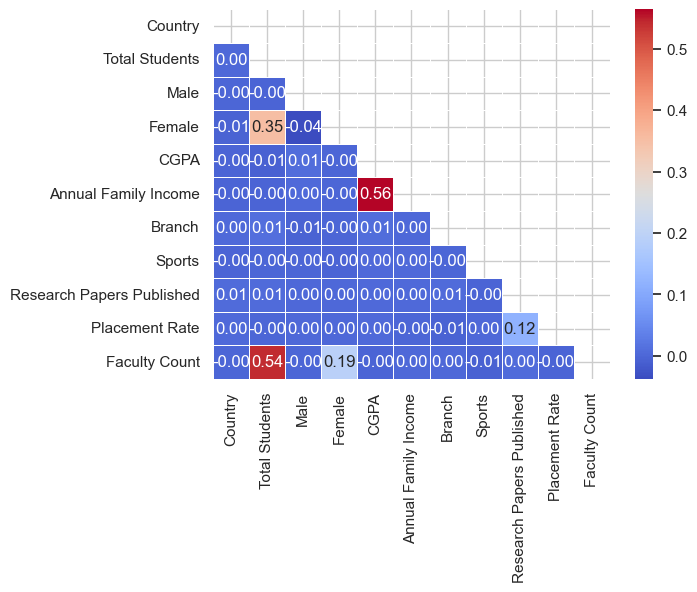

In [70]:
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

In [72]:
plt.show()

In [73]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [74]:
plt.show()

In [75]:
import matplotlib.pyplot as plt

In [76]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Branch', ylabel='CGPA'>

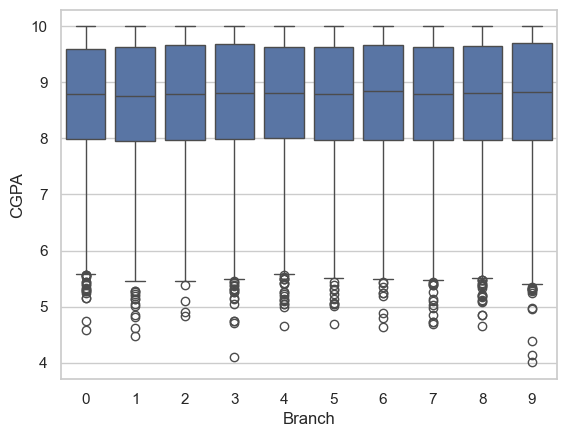

In [77]:
sns.boxplot(x=df["Branch"], y=df["CGPA"])

In [80]:
plt.show()

In [81]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Country', ylabel='CGPA'>

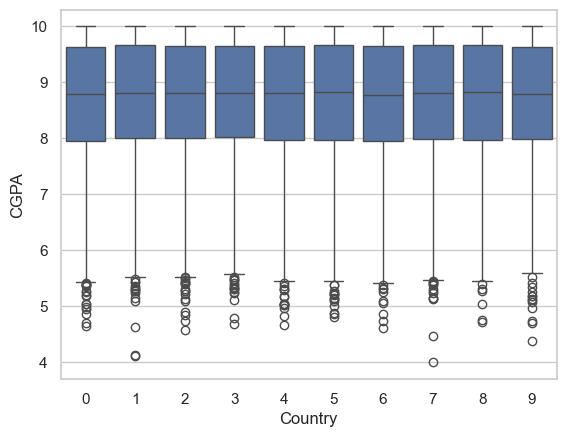

In [82]:
sns.boxplot(x=df["Country"], y=df["CGPA"])

In [85]:
plt.show()

In [86]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Sports', ylabel='CGPA'>

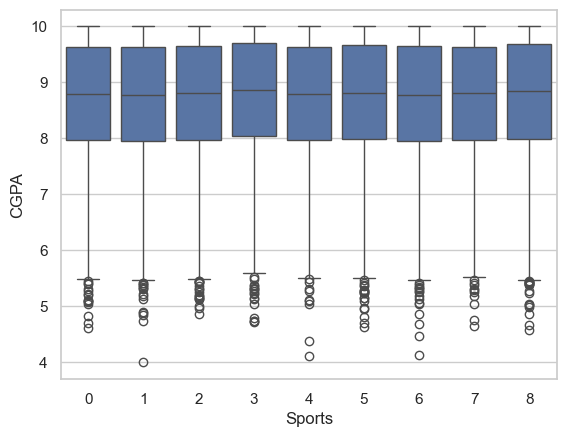

In [87]:
sns.boxplot(x=df["Sports"], y=df["CGPA"])

In [90]:
plt.show()

In [91]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

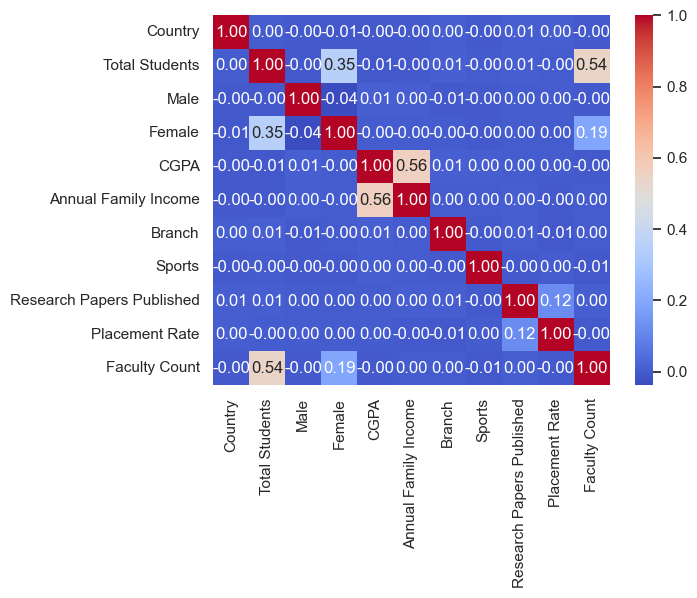

In [92]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

In [94]:
plt.show()

In [95]:
X = df.drop(columns=["CGPA"])

In [96]:
y = df["CGPA"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
scaler = StandardScaler()

In [99]:
X_train = scaler.fit_transform(X_train)

In [100]:
X_test = scaler.transform(X_test)

In [101]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [102]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [103]:
y_pred = model.predict(X_test)

In [104]:
mae = mean_absolute_error(y_test, y_pred)

In [105]:
mse = mean_squared_error(y_test, y_pred)

In [106]:
r2 = r2_score(y_test, y_pred)

In [107]:
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.7145364969934999


In [108]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.7863103969288392


In [109]:
print(f"R2 Score: {r2}")

R2 Score: 0.2930980378393865


In [110]:
importances = model.feature_importances_
feature_names = X.columns

In [111]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [124]:
feature_importances = pd.DataFrame({"Feature": feature_names, "Importance": importances})

In [125]:
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

In [126]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

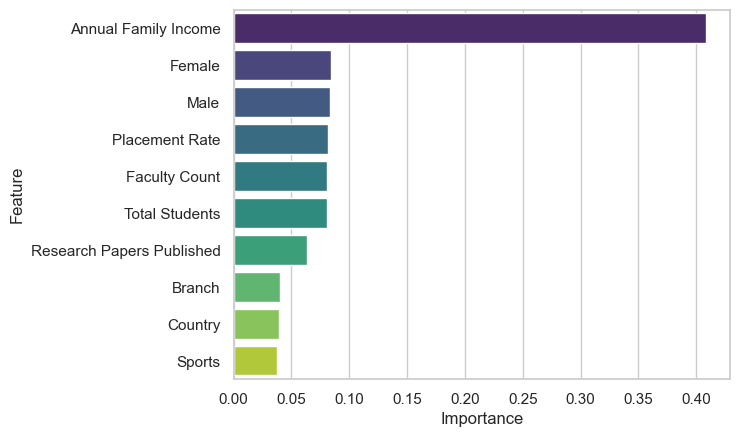

In [129]:
sns.barplot(
    x=feature_importances["Importance"], 
    y=feature_importances["Feature"], 
    hue=feature_importances["Feature"],  
    palette="viridis", 
    legend=False 
)

In [116]:
plt.show()

In [117]:
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='CGPA'>

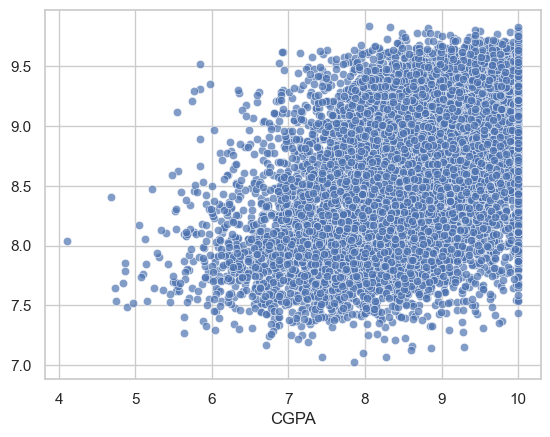

In [118]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

Text(0.5, 0, 'Actual CGPA')

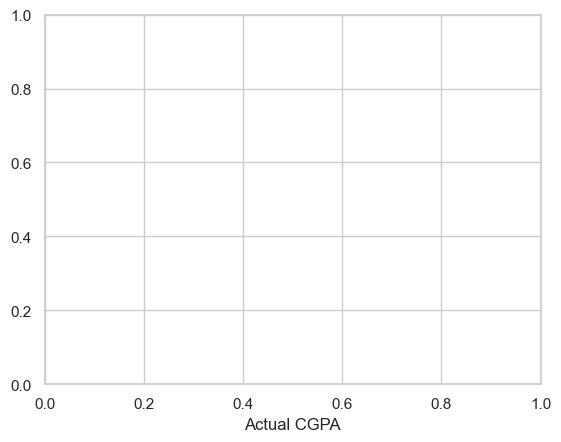

In [119]:
plt.xlabel("Actual CGPA")

Text(0, 0.5, 'Predicted CGPA')

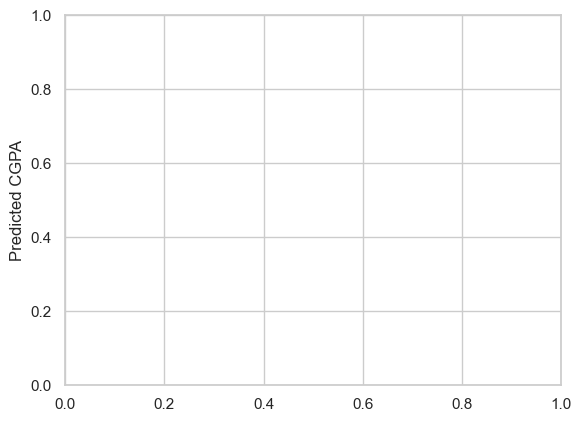

In [120]:
plt.ylabel("Predicted CGPA")

Text(0.5, 1.0, 'Actual vs Predicted CGPA')

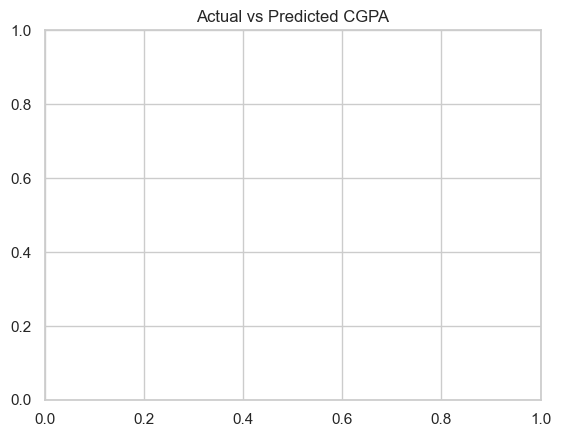

In [121]:
plt.title("Actual vs Predicted CGPA")

In [131]:
plt.show()